In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading `Churn` Dataset**

In [2]:
# Read the CSV file
df = pd.read_csv('D:\CS-UT\_Data_Mining\Churn(preprocessing).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3166 non-null   object 
 5   VMail Plan      3166 non-null   object 
 6   VMail Message   3166 non-null   float64
 7   Day Mins        3166 non-null   float64
 8   Day Calls       3166 non-null   float64
 9   Day Charge      3166 non-null   float64
 10  Eve Mins        3166 non-null   float64
 11  Eve Calls       3166 non-null   float64
 12  Eve Charge      3166 non-null   float64
 13  Night Mins      3166 non-null   float64
 14  Night Calls     3166 non-null   float64
 15  Night Charge    3166 non-null   float64
 16  Intl Mins       3166 non-null   float64
 17  Intl Calls      3166 non-null   f

number of missing data in each field:

In [4]:
df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan        167
VMail Plan        167
VMail Message     167
Day Mins          167
Day Calls         167
Day Charge        167
Eve Mins          167
Eve Calls         167
Eve Charge        167
Night Mins        167
Night Calls       167
Night Charge      167
Intl Mins         167
Intl Calls        167
Intl Charge       167
CustServ Calls    167
Churn.            167
dtype: int64

In [5]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,101.064806,437.182418,7.066014,179.573563,100.389766,30.465351,199.969931,100.562539,17.381617,201.116709,99.194567,8.390777,9.653190,5.266267,2.485250,1.554011
std,39.822106,42.371290,13.647552,54.513905,20.102667,9.305007,50.685021,19.934879,4.317994,50.542709,19.596371,2.282716,2.787857,2.491346,0.757422,1.314672
min,1.000000,408.000000,-1.000000,-0.100000,0.000000,-0.100000,-1.000000,0.000000,0.300000,23.400000,32.000000,0.400000,-0.700000,0.000000,-0.500000,-1.000000
25%,74.000000,408.000000,-1.000000,143.400000,87.000000,24.300000,165.900000,87.000000,14.400000,167.300000,86.000000,6.800000,7.900000,4.000000,2.000000,1.000000
50%,101.000000,415.000000,-1.000000,179.150000,101.000000,30.300000,200.500000,101.000000,17.400000,201.150000,99.000000,8.400000,9.700000,5.000000,2.500000,1.000000
75%,127.000000,510.000000,18.000000,216.300000,114.000000,36.700000,233.975000,114.000000,20.300000,235.600000,113.000000,10.000000,11.500000,6.000000,3.000000,2.000000
max,243.000000,510.000000,50.000000,350.900000,165.000000,59.500000,362.800000,170.000000,31.300000,395.100000,174.000000,17.300000,19.300000,21.000000,5.200000,9.000000


In [6]:
df.shape, df.columns

((3333, 21),
 Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
        'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
        'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
        'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
        'CustServ Calls', 'Churn.'],
       dtype='object'))

### **1. Handling Missing Data**

#### `1.a` Remove rows where the "Int’l Plan" column contains missing values



In [7]:
# Remove rows where the "Int’l Plan" column contains missing values
df = df.dropna(subset=["Int'l Plan"])

In [8]:
df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan          0
VMail Plan        159
VMail Message     158
Day Mins          157
Day Calls         154
Day Charge        164
Eve Mins          160
Eve Calls         160
Eve Charge        158
Night Mins        158
Night Calls       157
Night Charge      159
Intl Mins         160
Intl Calls        163
Intl Charge       160
CustServ Calls    159
Churn.            160
dtype: int64

In [9]:
df.shape

(3166, 21)

#### `1.b` Replace the missing values in the "VMail Plan" column with the mode (most frequent value)


In [10]:
df = pd.read_csv('D:\CS-UT\_Data_Mining\Churn(preprocessing).csv')

In [11]:
# Calculate the mode of the "VMail Plan" column
mode_vmail_plan = df['VMail Plan'].mode()[0]

# Replace missing values in the "VMail Plan" column with the mode
df['VMail Plan'].fillna(mode_vmail_plan, inplace=True)

C:\Users\Mahoor\AppData\Local\Temp\ipykernel_21336\2134385568.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VMail Plan'].fillna(mode_vmail_plan, inplace=True)


In [12]:
df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan        167
VMail Plan          0
VMail Message     167
Day Mins          167
Day Calls         167
Day Charge        167
Eve Mins          167
Eve Calls         167
Eve Charge        167
Night Mins        167
Night Calls       167
Night Charge      167
Intl Mins         167
Intl Calls        167
Intl Charge       167
CustServ Calls    167
Churn.            167
dtype: int64

#### `1.c` Impute the missing data in "VMail Message", "Day Mins", and "Day Calls":



In [13]:
df = pd.read_csv('D:\CS-UT\_Data_Mining\Churn(preprocessing).csv')

- *VMail Message :* <br>
    This cell calculates the mean and standard deviation of the "VMail Message" column, and then applies a function to each row to either set the missing value to `-1 if "VMail Plan" is 'no'` or replace it with a `random value from a normal distribution otherwise`.

In [14]:
# Function to impute "VMail Message" based on "VMail Plan"
def impute_vmail_message(row, mean_vmail_message, std_vmail_message):
    if pd.isnull(row['VMail Message']):
        if row['VMail Plan'] == "no":
            return -1
        else:
            return np.random.normal(mean_vmail_message, std_vmail_message)
    return row['VMail Message']

# Calculate mean and standard deviation for "VMail Message"
mean_vmail_message = df['VMail Message'].mean()
std_vmail_message = df['VMail Message'].std()

# Apply the imputation function to each row
df['VMail Message'] = df.apply(impute_vmail_message, axis=1, args=(mean_vmail_message, std_vmail_message))


In [15]:
df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan        167
VMail Plan        167
VMail Message       0
Day Mins          167
Day Calls         167
Day Charge        167
Eve Mins          167
Eve Calls         167
Eve Charge        167
Night Mins        167
Night Calls       167
Night Charge      167
Intl Mins         167
Intl Calls        167
Intl Charge       167
CustServ Calls    167
Churn.            167
dtype: int64

- *Day Calls :* <br>
We'll start by filling missing values in 'Day Calls' `randomly`, using a `normal distribution`.

In [16]:
# Calculate the mean and standard deviation of the 'Day Calls' column
mean_day_calls = df['Day Calls'].mean()
std_day_calls = df['Day Calls'].std()

# Generate random values to fill missing entries
missing_indices = df['Day Calls'].isnull()
random_values = np.random.normal(mean_day_calls, std_day_calls, missing_indices.sum())

# Fill the missing values with the generated random values
df.loc[missing_indices, 'Day Calls'] = random_values

In [17]:
df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan        167
VMail Plan        167
VMail Message       0
Day Mins          167
Day Calls           0
Day Charge        167
Eve Mins          167
Eve Calls         167
Eve Charge        167
Night Mins        167
Night Calls       167
Night Charge      167
Intl Mins         167
Intl Calls        167
Intl Charge       167
CustServ Calls    167
Churn.            167
dtype: int64

- *Day Mins :* <br>
Then use `linear regression` model to predict 'Day Mins' based on 'Day Calls'...

In [18]:
from sklearn.linear_model import LinearRegression

daymins_missed_indices = df['Day Mins'].isnull()

# Separate rows with and without missing 'Day Mins'
df_no_missing = df.dropna(subset=['Day Mins'])
df_missing = df[daymins_missed_indices]

# Train a regression model
X_train = df_no_missing[['Day Calls']]
y_train = df_no_missing['Day Mins']
reg = LinearRegression().fit(X_train, y_train)

# Predict missing 'Day Mins' using 'Day Calls'
X_missing = df_missing[['Day Calls']]
df.loc[daymins_missed_indices, 'Day Mins'] = reg.predict(X_missing)

In [19]:
df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan        167
VMail Plan        167
VMail Message       0
Day Mins            0
Day Calls           0
Day Charge        167
Eve Mins          167
Eve Calls         167
Eve Charge        167
Night Mins        167
Night Calls       167
Night Charge      167
Intl Mins         167
Intl Calls        167
Intl Charge       167
CustServ Calls    167
Churn.            167
dtype: int64

#### `1.d` Impute the missing data in the "Night Mins" column randomly, using a normal distribution.

In [20]:
df = pd.read_csv('D:\CS-UT\_Data_Mining\Churn(preprocessing).csv')

In [21]:
# Calculate the mean and standard deviation of the "Night Mins" column
mean_night_mins = df['Night Mins'].mean()
std_night_mins = df['Night Mins'].std()

# Generate random values to fill missing entries
missing_indices = df['Night Mins'].isnull()
random_values = np.random.normal(mean_night_mins, std_night_mins, missing_indices.sum())

# Fill the missing values with the generated random values
df.loc[missing_indices, 'Night Mins'] = random_values

In [22]:
df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan        167
VMail Plan        167
VMail Message     167
Day Mins          167
Day Calls         167
Day Charge        167
Eve Mins          167
Eve Calls         167
Eve Charge        167
Night Mins          0
Night Calls       167
Night Charge      167
Intl Mins         167
Intl Calls        167
Intl Charge       167
CustServ Calls    167
Churn.            167
dtype: int64

In [23]:
Q1_res_df = df.copy()

----

### **2. Identifying Outliers:**

#### `2.a` Remove the missing values in the "Day Charge" column, and then identify its outliers using a graph.

In [24]:
df = pd.read_csv('D:\CS-UT\_Data_Mining\Churn(preprocessing).csv')

In [25]:
# Remove missing values in the "Day Charge" column
df = df.dropna(subset=['Day Charge'])

df.isnull().sum()

State               0
Account Length      0
Area Code           0
Phone               0
Int'l Plan        164
VMail Plan        160
VMail Message     158
Day Mins          158
Day Calls         160
Day Charge          0
Eve Mins          158
Eve Calls         157
Eve Charge        157
Night Mins        152
Night Calls       157
Night Charge      163
Intl Mins         164
Intl Calls        160
Intl Charge       161
CustServ Calls    156
Churn.            159
dtype: int64

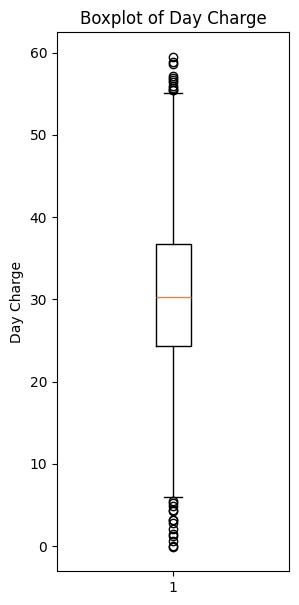

In [26]:
# Plot the "Day Charge" column to identify outliers visually
plt.figure(figsize=(3, 7))
plt.boxplot(df['Day Charge'])
plt.title("Boxplot of Day Charge")
plt.ylabel("Day Charge")
plt.show()

#### `2.b` Identify the outliers in the "Day Charge" column using the Z-score method.


In [27]:
from scipy.stats import zscore

# Calculate Z-scores
df['Day Charge Z-score'] = zscore(df['Day Charge'])

# Identify outliers (using a threshold of |Z| > 3)
outliers_zscore = df[abs(df['Day Charge Z-score']) > 3]
print("Outliers identified using Z-score method:")
print(outliers_zscore['Phone'])

Outliers identified using Z-score method:
365     343-5709
985     345-9140
1052    378-6772
1345    392-2555
1397    413-7655
1986    405-9233
2594    348-1163
2736    403-1128
2753    406-4158
Name: Phone, dtype: object


#### `2.c` Identify the outliers once again using the IQR method.

In [28]:
# Calculate IQR
Q1 = df['Day Charge'].quantile(0.25)
Q3 = df['Day Charge'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify outliers
outliers_iqr = df[(df['Day Charge'] < lower_bound) | (df['Day Charge'] > upper_bound)]
print("Outliers identified using IQR method:")
print(outliers_iqr['Phone'])

Outliers identified using IQR method:
15      351-7269
156     370-9116
197     378-3625
365     343-5709
605     373-2053
685     408-4530
741     337-1225
975     332-6181
985     345-9140
1052    378-6772
1076    337-4339
1345    392-2555
1397    413-7655
1621    370-9533
1679    393-4823
1986    405-9233
2028    408-4836
2124    381-9367
2252    333-7449
2412    373-4264
2594    348-1163
2736    403-1128
2753    406-4158
3046    357-5784
3174    359-5091
Name: Phone, dtype: object


**Comparison of the results of two methods**

In [29]:
# Find intersection of outliers
common_outliers = pd.merge(outliers_zscore, outliers_iqr, on=['Phone'])
print("Users identified as outliers by both methods:")
print(common_outliers['Phone'])

Users identified as outliers by both methods:
0    343-5709
1    345-9140
2    378-6772
3    392-2555
4    413-7655
5    405-9233
6    348-1163
7    403-1128
8    406-4158
Name: Phone, dtype: object


In [30]:
len(outliers_zscore), len(outliers_iqr), len(common_outliers)

(9, 25, 9)

### **3. Data Normalization**

#### `3.a` Normalize the data in the "Night Mins" column using the min-max method. (Use the completed data from question 1.)

In [31]:
# Min-Max normalization
Q1_res_df['Night Mins Min-Max'] = (Q1_res_df['Night Mins'] - Q1_res_df['Night Mins'].min()) / (Q1_res_df['Night Mins'].max() - Q1_res_df['Night Mins'].min())

In [32]:
# Display the first few rows to confirm
print(Q1_res_df[['Night Mins', 'Night Mins Min-Max']].head())

   Night Mins  Night Mins Min-Max
0       245.0            0.596180
1       254.5            0.621738
2       162.7            0.374765
3       196.9            0.466774
4       187.2            0.440678


#### `3.b` Standardize the data in the "Night Mins" column using the Z-score method.

In [33]:
from scipy.stats import zscore

# Z-score standardization
Q1_res_df['Night Mins Z-score'] = zscore(Q1_res_df['Night Mins'])

# Display the first few rows to confirm
Q1_res_df[['Night Mins', 'Night Mins Z-score']].head()

,Night Mins,Night Mins Z-score
0,245.0,0.859200
1,254.5,1.047028
2,162.7,-0.767984
3,196.9,-0.091803
4,187.2,-0.283585


#### `3.c` Compare the results of both normalization methods using a graph.

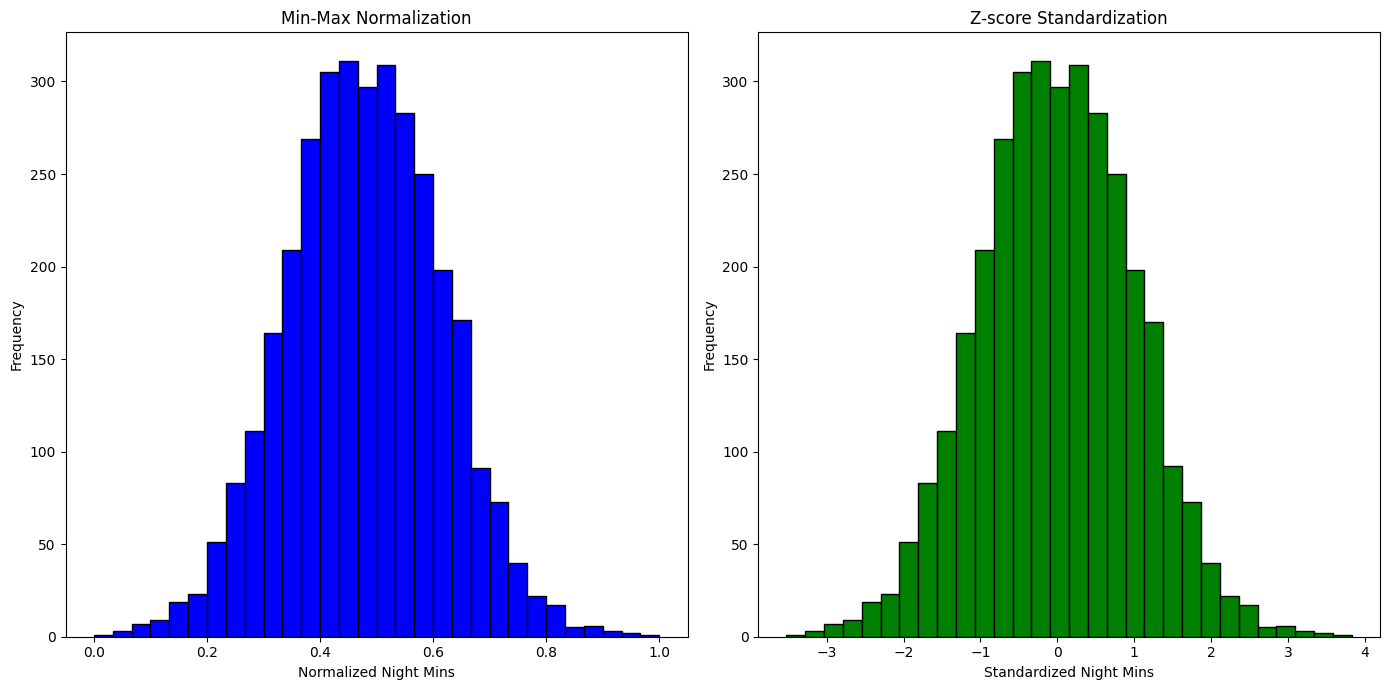

In [34]:
plt.figure(figsize=(14, 7))

# Plot Min-Max Normalized Data
plt.subplot(1, 2, 1)
plt.hist(Q1_res_df['Night Mins Min-Max'], bins=30, color='blue', edgecolor='black')
plt.title('Min-Max Normalization')
plt.xlabel('Normalized Night Mins')
plt.ylabel('Frequency')

# Plot Z-score Standardized Data
plt.subplot(1, 2, 2)
plt.hist(Q1_res_df['Night Mins Z-score'], bins=30, color='green', edgecolor='black')
plt.title('Z-score Standardization')
plt.xlabel('Standardized Night Mins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


$\downarrow$ 

The Z-standardized data will have mean 0 and standard deviation 1 but the `skewness wouldn't changed` so `data had normal distribution before applying transformation`.

The min-max normalization values range from `0 to 1` and like Z-score don't change the distribution.

#### `3.d` Calculate and compare the skewness of the data before and after applying both transformations.

In [35]:
from scipy.stats import skew

# Calculate skewness
original_skew = skew(Q1_res_df['Night Mins'])
min_max_skew = skew(Q1_res_df['Night Mins Min-Max'])
z_score_skew = skew(Q1_res_df['Night Mins Z-score'])

print(f'Original Skewness: {original_skew}')
print(f'Min-Max Normalized Skewness: {min_max_skew}')
print(f'Z-score Standardized Skewness: {z_score_skew}')


Original Skewness: 0.01753040618895532
Min-Max Normalized Skewness: 0.017530406188955117
Z-score Standardized Skewness: 0.017530406188954482


$\downarrow$ 

A skewness value of 0.017 indicates that the data is very `close to symmetric`.

Since it's near zero, it shows that both before and after the transformations, the data distribution `has not significantly changed` in terms of skewness.

### **4. Normality Check**
Check the normality of the data in the "Eve Mins" column (only available
values) using visualizations such as histograms or Q-Q plots.


In [36]:
df = pd.read_csv('D:\CS-UT\_Data_Mining\Churn(preprocessing).csv')

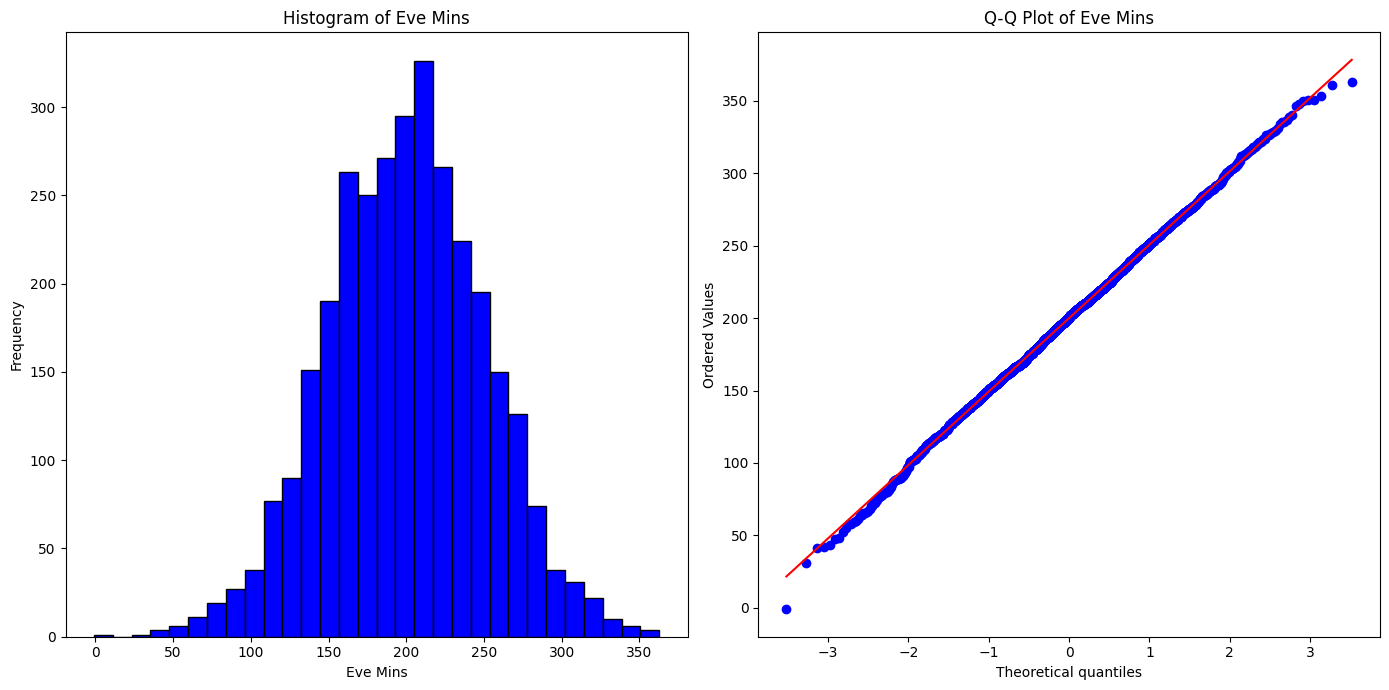

In [37]:
import scipy.stats as stats

# Filter out missing values in the "Eve Mins" column
eve_mins = df['Eve Mins'].dropna()

# Plotting the histogram
plt.figure(figsize=(14, 7))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(eve_mins, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Eve Mins')
plt.xlabel('Eve Mins')
plt.ylabel('Frequency')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(eve_mins, dist="norm", plot=plt)
plt.title('Q-Q Plot of Eve Mins')

plt.tight_layout()
plt.show()


$\downarrow$ 

Based on the `histogram` and `Q-Q plot`, the data is very close to normal distribution.

You can see how well the data quantiles and normal quantiles are similar in the Q-Q plot.